## Creating Hierarchically nested data splits

In [6]:
import pandas as pd

# Load labeled data
df_labeled = pd.read_parquet("data/labeled.parquet")

# Separate by label
df_pos = df_labeled[df_labeled["label"] == 1].reset_index(drop=True)
df_neg = df_labeled[df_labeled["label"] == 0].reset_index(drop=True)

# Function to create nested splits
def create_nested_split(pos_df, neg_df, sizes):
    nested = {}
    for size in sizes:
        half = size // 2
        nested[f"train_{size}"] = pd.concat([pos_df[:half], neg_df[:half]], ignore_index=True).sample(frac=1, random_state=42)
    return nested

# Create splits
split_sizes = [25, 50, 100, 150, 200, 250, 300]  # 300 = full labeled
nested_splits = create_nested_split(df_pos, df_neg, split_sizes)

# Optional: save splits
for name, df in nested_splits.items():
    df.to_parquet(f"data/{name}.parquet")

# Quick check
for name, df in nested_splits.items():
    print(f"{name}: {df.shape}, Pos: {sum(df.label==1)}, Neg: {sum(df.label==0)}")

train_25: (24, 3), Pos: 12, Neg: 12
train_50: (50, 3), Pos: 25, Neg: 25
train_100: (100, 3), Pos: 50, Neg: 50
train_150: (150, 3), Pos: 75, Neg: 75
train_200: (200, 3), Pos: 100, Neg: 100
train_250: (250, 3), Pos: 125, Neg: 125
train_300: (300, 3), Pos: 150, Neg: 150


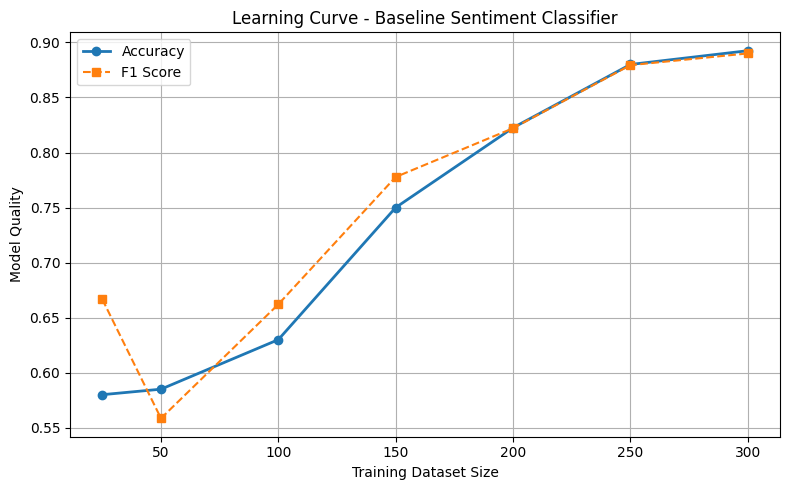

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load metrics
df = pd.read_csv("results/baseline_metrics.csv")

# Plot learning curve
plt.figure(figsize=(8, 5))
plt.plot(df["train_size"], df["eval_accuracy"], marker='o', label="Accuracy", linewidth=2)
plt.plot(df["train_size"], df["eval_f1"], marker='s', label="F1 Score", linestyle='--')
plt.xlabel("Training Dataset Size")
plt.ylabel("Model Quality")
plt.title("Learning Curve - Baseline Sentiment Classifier")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()